In [61]:
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
sns.set_style('whitegrid')
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.style.use('ggplot')
import scipy
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, Binarizer, LabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import gc

In [2]:
train = pd.read_csv('E:\\project\\tianchi game\\tianchi_data\\round1_ijcai_18_train_20180301.txt', sep=' ')

In [3]:

test = pd.read_csv('E:\\project\\tianchi game\\tianchi_data\\round1_ijcai_18_test_a_20180301.txt', sep=' ')

In [4]:
cols = list(train.columns)
cols.remove('is_trade')
cols

['instance_id',
 'item_id',
 'item_category_list',
 'item_property_list',
 'item_brand_id',
 'item_city_id',
 'item_price_level',
 'item_sales_level',
 'item_collected_level',
 'item_pv_level',
 'user_id',
 'user_gender_id',
 'user_age_level',
 'user_occupation_id',
 'user_star_level',
 'context_id',
 'context_timestamp',
 'context_page_id',
 'predict_category_property',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_star_level',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description']

In [5]:
train.predict_category_property.head(2)

0    5799347067982556520:-1;509660095530134768:-1;5...
1    5799347067982556520:9172976955054793469;790838...
Name: predict_category_property, dtype: object

In [6]:
gc.collect()

11

In [7]:
for i in range(13):
    train['predict_category_property_%d'%(i)] = train['predict_category_property'].apply(
        lambda x:str(x.split(";")[i]).split(":")[0] if len(x.split(";")) > i else np.nan
    )


In [8]:
train.item_category_list.head()

0    7908382889764677758;5799347067982556520
1    7908382889764677758;5799347067982556520
2    7908382889764677758;5799347067982556520
3    7908382889764677758;5799347067982556520
4    7908382889764677758;5799347067982556520
Name: item_category_list, dtype: object

In [9]:
tt = CountVectorizer().fit_transform(train.item_category_list)
tt = pd.DataFrame(tt.toarray())
'''
for i in range(len(tt)):
    new_name = 'item_category_list_%d' % i
    tt.rename(columns={i: new_name}, inplace=True)
tt.head()
'''

"\nfor i in range(len(tt)):\n    new_name = 'item_category_list_%d' % i\n    tt.rename(columns={i: new_name}, inplace=True)\ntt.head()\n"

In [10]:
tt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [11]:
train = pd.concat([train, tt], axis=1)
train.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,6,7,8,9,10,11,12,13,14,15
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,0,0,0,1,0,0,1,0,0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,0,0,0,1,0,0,1,0,0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,0,0,0,1,0,0,1,0,0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,0,0,0,1,0,0,1,0,0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,0,0,0,1,0,0,1,0,0,0


In [12]:
train.columns

Index([                 'instance_id',                      'item_id',
                 'item_category_list',           'item_property_list',
                      'item_brand_id',                 'item_city_id',
                   'item_price_level',             'item_sales_level',
               'item_collected_level',                'item_pv_level',
                            'user_id',               'user_gender_id',
                     'user_age_level',           'user_occupation_id',
                    'user_star_level',                   'context_id',
                  'context_timestamp',              'context_page_id',
          'predict_category_property',                      'shop_id',
              'shop_review_num_level',    'shop_review_positive_rate',
                    'shop_star_level',           'shop_score_service',
                'shop_score_delivery',       'shop_score_description',
                           'is_trade',  'predict_category_property_0',
      

In [13]:
train.pop('item_category_list')
gc.collect()

81

In [14]:
train.rename(columns={0: 'item_category_list_0'}, inplace=True)

In [15]:
train.rename(columns={15: 'item_category_list_15'}, inplace=True)

In [16]:
train.rename(columns={1: 'item_category_list_1'}, inplace=True)

In [17]:
train.rename(columns={10: 'item_category_list_10'}, inplace=True)

In [18]:
train.rename(columns={11: 'item_category_list_11'}, inplace=True)

In [19]:
train.rename(columns={12: 'item_category_list_12'}, inplace=True)

In [20]:
train.rename(columns={13: 'item_category_list_13'}, inplace=True)

In [21]:
train.rename(columns={14: 'item_category_list_14'}, inplace=True)

In [22]:
train.rename(columns={2: 'item_category_list_2'}, inplace=True)

In [23]:
train.rename(columns={3: 'item_category_list_3'}, inplace=True)

In [24]:
train.rename(columns={4: 'item_category_list_4'}, inplace=True)

In [25]:
train.rename(columns={5: 'item_category_list_5'}, inplace=True)

In [26]:
train.rename(columns={6: 'item_category_list_6'}, inplace=True)

In [27]:
train.rename(columns={7: 'item_category_list_7'}, inplace=True)
train.rename(columns={8: 'item_category_list_8'}, inplace=True)
train.rename(columns={9: 'item_category_list_9'}, inplace=True)

In [28]:
train.columns

Index(['instance_id', 'item_id', 'item_property_list', 'item_brand_id',
       'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'predict_category_property_0',
       'predict_category_property_1', 'predict_category_property_2',
       'predict_category_property_3', 'predict_category_property_4',
       'predict_category_property_5', 'predict_category_property_6',
       'predict_category_property_7', 'predict_category_property_8',
       'predict_category_property_9', 'predict_category_property_10',
       'predict_category_property_11', 'predict_category_property_1

In [29]:
train.head()

,instance_id,item_id,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,...,item_category_list_6,item_category_list_7,item_category_list_8,item_category_list_9,item_category_list_10,item_category_list_11,item_category_list_12,item_category_list_13,item_category_list_14,item_category_list_15
0,108641074714126964,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,...,0,0,0,1,0,0,1,0,0,0
1,5754713551599725161,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,...,0,0,0,1,0,0,1,0,0,0
2,842679481291040981,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,...,0,0,0,1,0,0,1,0,0,0
3,937088850059189027,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,...,0,0,0,1,0,0,1,0,0,0
4,7975697065017708072,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,...,0,0,0,1,0,0,1,0,0,0


In [30]:
train.item_property_list.head().iloc[0]

'2072967855524022579;5131280576272319091;2636395404473730413;8070395809181082496;6434796455031995313;7839592306500064003;3657871859501171040;1782439090818545916;6936314038707413523;5117290135792467652;720840888466250585;8838717711606756251;9172976955054793469;6296485275518770064;8154150695030794787;8199832121759092112;773321667872991333;7270669313837600482;3408398779125901630;4359277201620147874;448184584262668803;9029095803741432716'

In [31]:
for i in range(15):
    train['item_property_list_%d'%(i)] = train['item_property_list'].apply(
        lambda x:x.split(";")[i] if len(x.split(";")) > i else np.nan
    )
train.head()    

,instance_id,item_id,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,...,item_property_list_5,item_property_list_6,item_property_list_7,item_property_list_8,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14
0,108641074714126964,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
1,5754713551599725161,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
2,842679481291040981,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
3,937088850059189027,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
4,7975697065017708072,3412720377098676069,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787


In [32]:
train.pop('item_property_list')
train.head()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_property_list_5,item_property_list_6,item_property_list_7,item_property_list_8,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14
0,108641074714126964,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
1,5754713551599725161,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
2,842679481291040981,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
3,937088850059189027,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
4,7975697065017708072,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787


In [33]:
sorted(train.isnull().sum()/float(len(train)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.182892805006086e-06,
 2.5097356830036517e-05,
 6.065194567258825e-05,
 0.000242607782690353,
 0.00037436890604804473,
 0.0006901773128260042,
 0.0014828354993746576,
 0.002363334434828439,
 0.003170632746194613,
 0.0032772965127222686,
 0.10509518172577792,
 0.2502582936307091,
 0.4555504896076028,
 0.6589750239470613,
 0.8237119827330185,
 0.9311663160008199,
 0.9695820035219958,
 0.9912368395735123,
 0.9996088995227319,
 0.9998954276798748,
 0.9999602625183525]

In [34]:
thresh_count = len(train)*0.4 # 设定阀值
train = train.dropna(thresh=thresh_count, axis=1 ) #若某一列数据缺失的数量超过阀值就会被删除
sorted(train.isnull().sum()/float(len(train)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.182892805006086e-06,
 2.5097356830036517e-05,
 6.065194567258825e-05,
 0.000242607782690353,
 0.00037436890604804473,
 0.0006901773128260042,
 0.0014828354993746576,
 0.002363334434828439,
 0.003170632746194613,
 0.0032772965127222686,
 0.10509518172577792,
 0.2502582936307091,
 0.4555504896076028]

In [35]:
sorted(train.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 12,
 29,
 116,
 179,
 330,
 709,
 1130,
 1516,
 1567,
 50250,
 119658,
 217816]

In [36]:
len(train)*0.4

191255.2

In [37]:
train = train.dropna(thresh=50251.0, axis=1)
sorted(train.isnull().sum()/float(len(train)))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.182892805006086e-06,
 2.5097356830036517e-05,
 6.065194567258825e-05,
 0.000242607782690353,
 0.00037436890604804473,
 0.0006901773128260042,
 0.0014828354993746576,
 0.002363334434828439,
 0.003170632746194613,
 0.0032772965127222686,
 0.10509518172577792,
 0.2502582936307091,
 0.4555504896076028]

In [38]:
(train.isnull().sum(axis=0).sort_values(ascending=False)/float(len(train)))[:9]

predict_category_property_4   0.45555
predict_category_property_3   0.25026
predict_category_property_2   0.10510
item_property_list_14         0.00328
predict_category_property_1   0.00317
item_property_list_13         0.00236
item_property_list_12         0.00148
item_property_list_11         0.00069
item_property_list_10         0.00037
dtype: float64

In [39]:
train = train.drop('predict_category_property_4', axis=1)

In [40]:
train.columns

Index(['instance_id', 'item_id', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'predict_category_property_0',
       'predict_category_property_1', 'predict_category_property_2',
       'predict_category_property_3', 'item_category_list_0',
       'item_category_list_1', 'item_category_list_2', 'item_category_list_3',
       'item_category_list_4', 'item_category_list_5', 'item_category_list_6',
       'item_category_list_7', 'item_category_list_8', 'item_category_list_9',
       'item_category_list_10', 'item_category_list_11',
       'it

In [41]:
train.head(2)

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_property_list_5,item_property_list_6,item_property_list_7,item_property_list_8,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14
0,108641074714126964,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
1,5754713551599725161,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787


In [42]:
train.predict_category_property.head(2)

0    5799347067982556520:-1;509660095530134768:-1;5...
1    5799347067982556520:9172976955054793469;790838...
Name: predict_category_property, dtype: object

In [43]:
train.pop('predict_category_property')
train.columns

Index(['instance_id', 'item_id', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'shop_id',
       'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery', 'shop_score_description',
       'is_trade', 'predict_category_property_0',
       'predict_category_property_1', 'predict_category_property_2',
       'predict_category_property_3', 'item_category_list_0',
       'item_category_list_1', 'item_category_list_2', 'item_category_list_3',
       'item_category_list_4', 'item_category_list_5', 'item_category_list_6',
       'item_category_list_7', 'item_category_list_8', 'item_category_list_9',
       'item_category_list_10', 'item_category_list_11',
       'item_category_list_12', 'item_c

In [44]:
train = train.replace(-1, np.nan)
#train = train.fillna(train.mode().iloc[0])

In [45]:
train.isnull().sum(axis=0).sort_values(ascending=False)/float(len(train))

predict_category_property_3   0.25026
predict_category_property_2   0.10510
user_gender_id                0.02698
item_property_list_14         0.00328
predict_category_property_1   0.00317
item_property_list_13         0.00236
user_occupation_id            0.00202
user_age_level                0.00202
user_star_level               0.00202
item_sales_level              0.00191
item_property_list_12         0.00148
item_brand_id                 0.00099
item_property_list_11         0.00069
item_city_id                  0.00058
item_property_list_10         0.00037
item_property_list_9          0.00024
shop_score_description        0.00012
shop_score_delivery           0.00012
shop_score_service            0.00012
item_property_list_8          0.00006
item_property_list_7          0.00003
shop_review_positive_rate     0.00001
item_property_list_6          0.00000
item_id                       0.00000
shop_star_level               0.00000
item_pv_level                 0.00000
user_id     

In [48]:
train = train.fillna(train.mode().iloc[0])


In [54]:
gc.collect()

913

In [56]:
train.isnull().sum(axis=0).sort_values(ascending=False)

item_property_list_14          0
context_timestamp              0
predict_category_property_2    0
predict_category_property_1    0
predict_category_property_0    0
is_trade                       0
shop_score_description         0
shop_score_delivery            0
shop_score_service             0
shop_star_level                0
shop_review_positive_rate      0
shop_review_num_level          0
shop_id                        0
context_page_id                0
context_id                     0
item_category_list_0           0
user_star_level                0
user_occupation_id             0
user_age_level                 0
user_gender_id                 0
user_id                        0
item_pv_level                  0
item_collected_level           0
item_sales_level               0
item_price_level               0
item_city_id                   0
item_brand_id                  0
item_id                        0
predict_category_property_3    0
item_category_list_1           0
item_prope

In [58]:
train.columns

Index(['instance_id', 'item_id', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'shop_id',
       'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery', 'shop_score_description',
       'is_trade', 'predict_category_property_0',
       'predict_category_property_1', 'predict_category_property_2',
       'predict_category_property_3', 'item_category_list_0',
       'item_category_list_1', 'item_category_list_2', 'item_category_list_3',
       'item_category_list_4', 'item_category_list_5', 'item_category_list_6',
       'item_category_list_7', 'item_category_list_8', 'item_category_list_9',
       'item_category_list_10', 'item_category_list_11',
       'item_category_list_12', 'item_c

In [60]:
train.predict_category_property_0.head(2)

0    5799347067982556520
1    5799347067982556520
Name: predict_category_property_0, dtype: object

In [57]:
train.head(2)

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_property_list_5,item_property_list_6,item_property_list_7,item_property_list_8,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14
0,108641074714126964,3412720377098676069,1975590437749032960.00000,3948283326616420864.00000,3,3.00000,4,14,4505772604969228686,1.00000,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787
1,5754713551599725161,3412720377098676069,1975590437749032960.00000,3948283326616420864.00000,3,3.00000,4,14,2692638157208937547,0.00000,...,7839592306500064003,3657871859501171040,1782439090818545916,6936314038707413523,5117290135792467652,720840888466250585,8838717711606756251,9172976955054793469,6296485275518770064,8154150695030794787


In [75]:
enc_cols = ['instance_id', 'item_id', 'item_brand_id', 'item_city_id',  'user_id',  'item_property_list_0', 'item_property_list_1', 
            'item_property_list_2', 'item_property_list_3', 'item_property_list_4', 'item_property_list_5',
       'item_property_list_6', 'item_property_list_7', 'item_property_list_8',
       'item_property_list_9', 'item_property_list_10',
       'item_property_list_11', 'item_property_list_12',
       'item_property_list_13', 'item_property_list_14',  'predict_category_property_0',
       'predict_category_property_1', 'predict_category_property_2',
       'predict_category_property_3', 'context_id', 'shop_id', 'shop_star_level', 'user_occupation_id',
        'user_age_level', 'user_occupation_id', 'user_star_level', 'context_page_id', 'shop_star_level']
for c in enc_cols:
    train[c] = LabelEncoder().fit_transform(train[c])
train.head(2)    

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_property_list_5,item_property_list_6,item_property_list_7,item_property_list_8,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14
0,5703,3760,447,49,3,3.00000,4,14,96499,1.00000,...,401,218,85,877,820,1556,2306,2772,2023,2895
1,298346,3760,447,49,3,3.00000,4,14,57700,0.00000,...,401,218,85,877,820,1556,2306,2772,2023,2895


In [63]:
train['test'] = LabelEncoder().fit_transform(train['predict_category_property_2'])

In [64]:
train.test.head()

0    249
1    364
2    364
3    364
4    364
Name: test, dtype: int64

In [66]:
len(train.test.unique())

458

In [67]:
del train['test']

In [76]:
for c in train.columns:
    print(c)
    print(train[c].head(2).iloc[0])

instance_id
5703
item_id
3760
item_brand_id
447
item_city_id
49
item_price_level
3
item_sales_level
3.0
item_collected_level
4
item_pv_level
14
user_id
96499
user_gender_id
1.0
user_age_level
3
user_occupation_id
3
user_star_level
3
context_id
14807
context_timestamp
1537236544
context_page_id
5
shop_id
2872
shop_review_num_level
4
shop_review_positive_rate
1.0
shop_star_level
3
shop_score_service
1.0
shop_score_delivery
1.0
shop_score_description
1.0
is_trade
0
predict_category_property_0
152
predict_category_property_1
184
predict_category_property_2
249
predict_category_property_3
389
item_category_list_0
0
item_category_list_1
0
item_category_list_2
0
item_category_list_3
0
item_category_list_4
0
item_category_list_5
0
item_category_list_6
0
item_category_list_7
0
item_category_list_8
0
item_category_list_9
1
item_category_list_10
0
item_category_list_11
0
item_category_list_12
1
item_category_list_13
0
item_category_list_14
0
item_category_list_15
0
item_property_list_0
27
item_pr

In [77]:
len(train.context_id.unique())


478111

In [78]:
gc.collect()

2913

In [87]:
train.context_timestamp.head(2)

0    2018-09-18 10:09:04
1    2018-09-18 12:00:32
Name: context_timestamp, dtype: object

In [83]:
import time
def time2cov(time_):
    '''
    时间是根据天数推移，所以日期为脱敏，但是时间本身不脱敏
    :param time_:
    :return:
    '''
    return time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time_))

In [86]:
train['context_timestamp'] = train['context_timestamp'].apply(time2cov)

TypeError: an integer is required (got type str)

In [89]:
train['context_timestamp_tmp'] = pd.to_datetime(train['context_timestamp'])
train['week'] = train['context_timestamp_tmp'].dt.weekday     #刚好是7天的数据
train['hour'] = train['context_timestamp_tmp'].dt.hour
train['day'] = train['context_timestamp_tmp'].dt.day
train.head(2)

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_property_list_9,item_property_list_10,item_property_list_11,item_property_list_12,item_property_list_13,item_property_list_14,context_timestamp_tmp,week,hour,day
0,5703,3760,447,49,3,3.00000,4,14,96499,1.00000,...,820,1556,2306,2772,2023,2895,2018-09-18 10:09:04,1,10,18
1,298346,3760,447,49,3,3.00000,4,14,57700,0.00000,...,820,1556,2306,2772,2023,2895,2018-09-18 12:00:32,1,12,18


In [92]:
print(train.day.unique())
print(train.week.unique())
print(train.hour.unique())

[18 21 19 20 22 23 24]
[1 4 2 3 5 6 0]
[10 12  3  6 19 23 22 16  2 17 11 14  0 18 15 21  8 20  9 13  1  7  4  5]


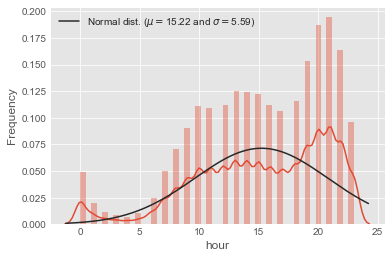

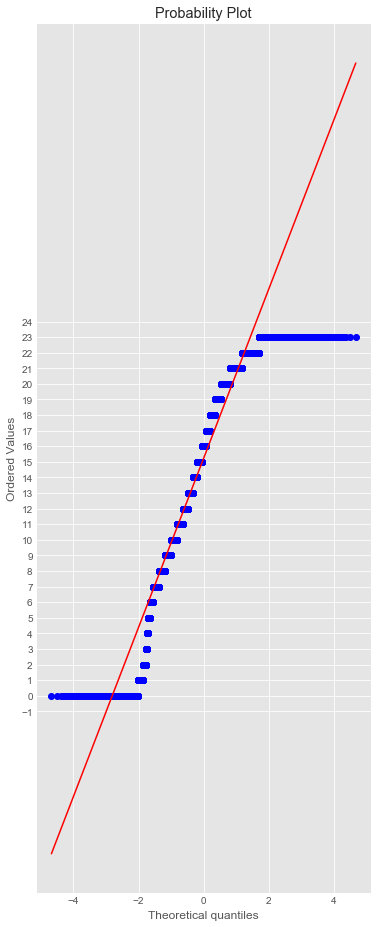

In [99]:
sns.distplot(train.hour, fit=norm)
(mu, sigma) = norm.fit(train.hour)
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.figure(figsize=(6,16))
stats.probplot(train.hour, plot=plt)
my_y_ticks = np.arange(-1, 25, 1)
plt.yticks(my_y_ticks)
plt.show()

In [117]:
def plt_func(col, figsize=(6,6), y_ticks=np.arange(6, 6, 1)):
    print(col)
    #print(train[col].head(1))
    sns.distplot(train[col], fit=norm)
    plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.figure(figsize=figsize)
    stats.probplot(train[col], plot=plt)
    plt.yticks(y_ticks)
    plt.show()

hour


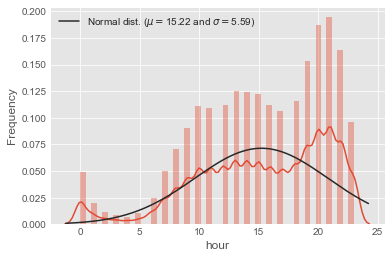

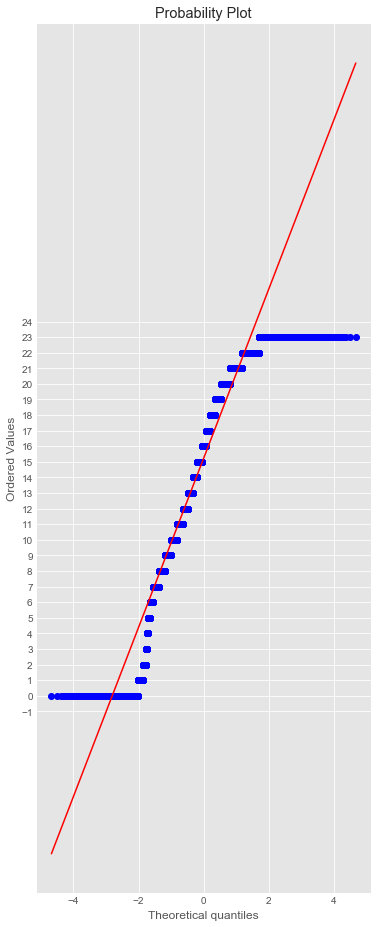

In [115]:
plt_func('hour', figsize=(6, 16), y_ticks=np.arange(-1, 25, 1))

instance_id


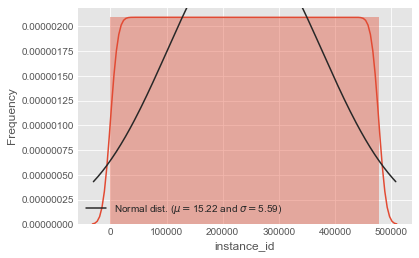

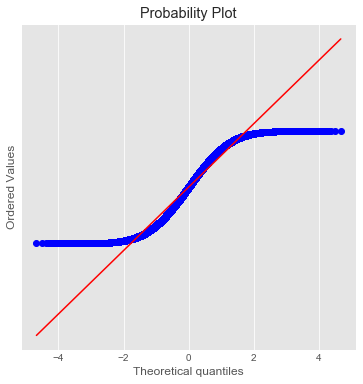

item_id


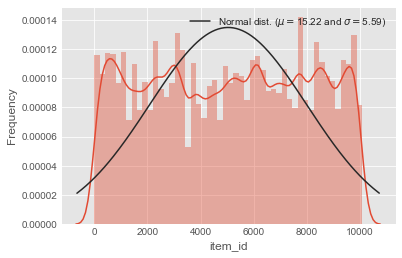

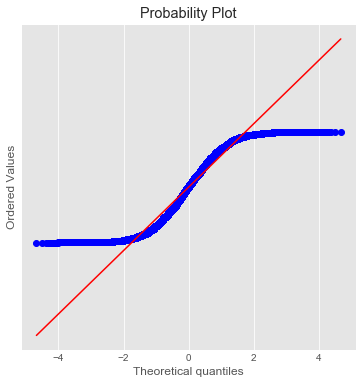

item_brand_id


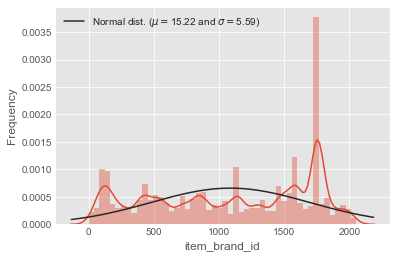

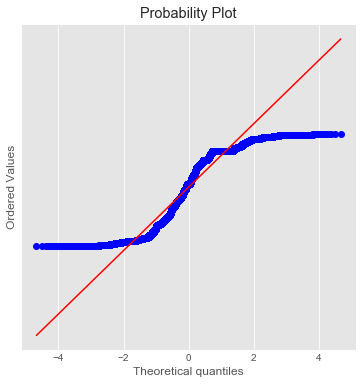

item_city_id


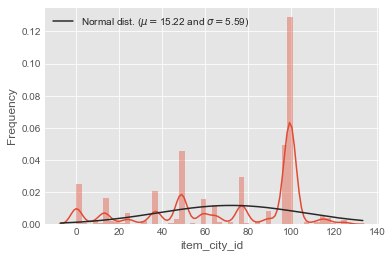

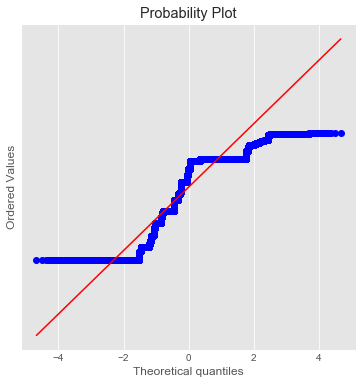

item_price_level


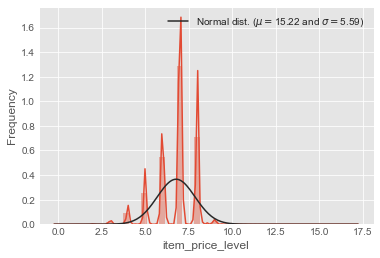

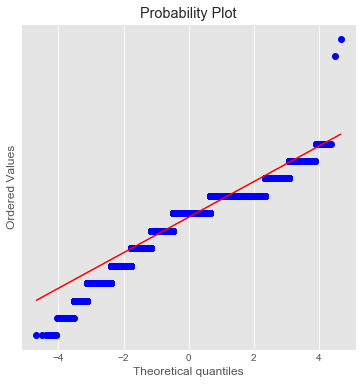

item_sales_level


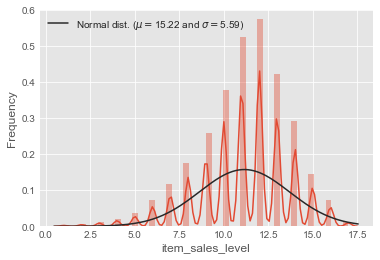

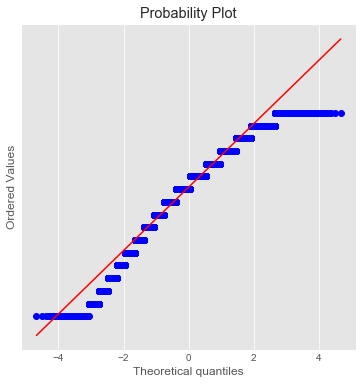

item_collected_level


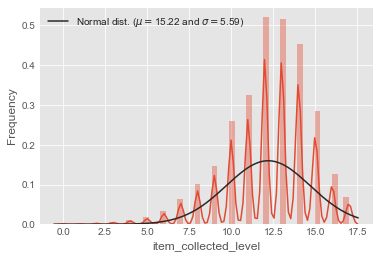

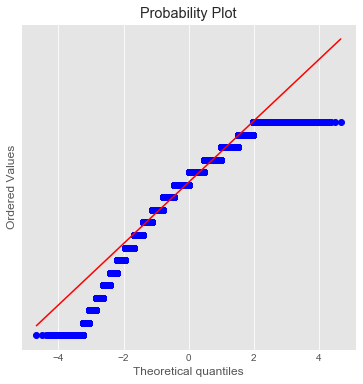

item_pv_level


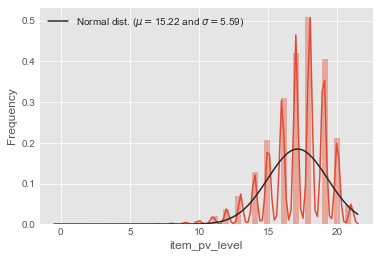

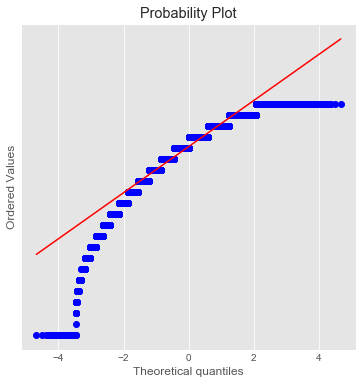

user_id


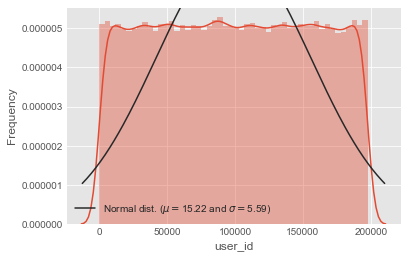

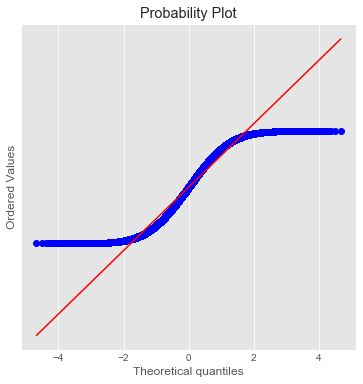

user_gender_id


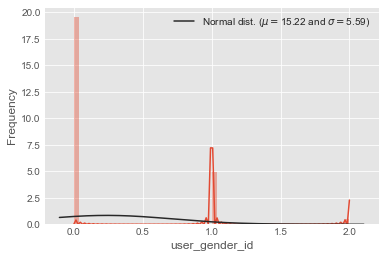

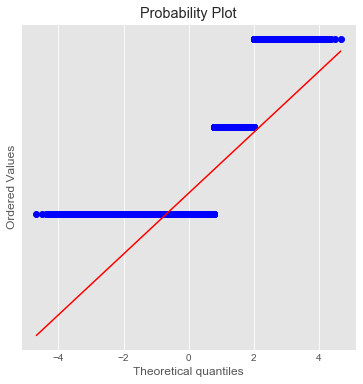

user_age_level


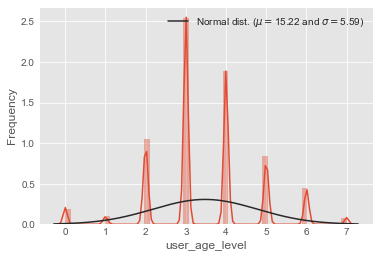

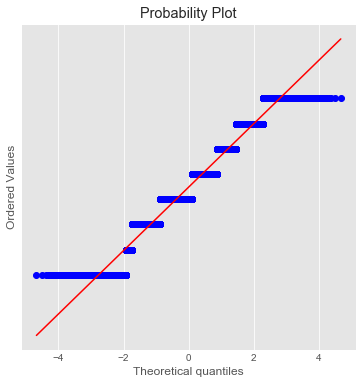

user_occupation_id


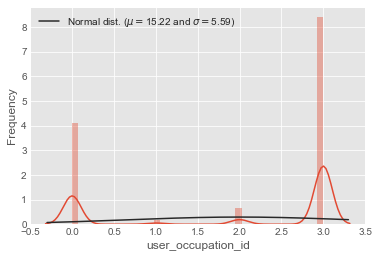

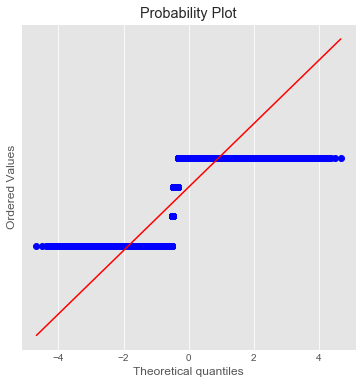

user_star_level


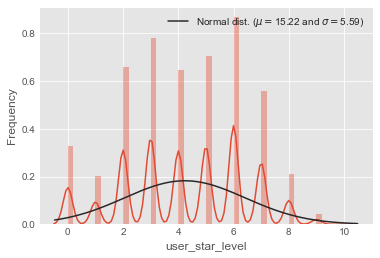

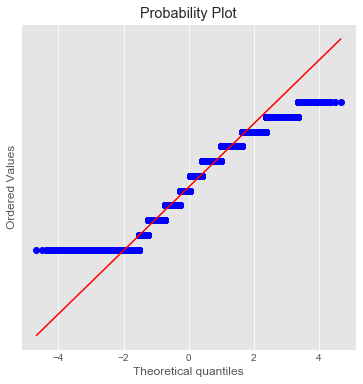

context_id


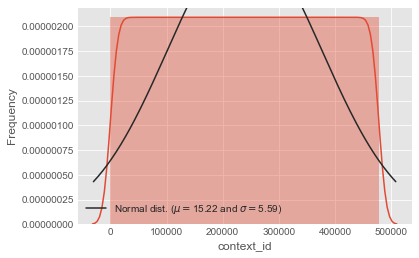

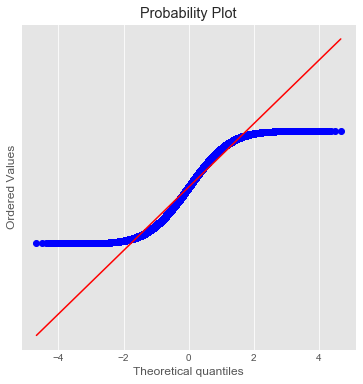

context_timestamp


TypeError: unsupported operand type(s) for /: 'str' and 'int'

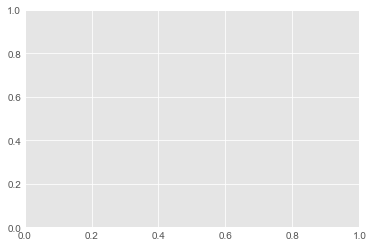

In [118]:
for c in train.columns:
    plt_func(c)

test


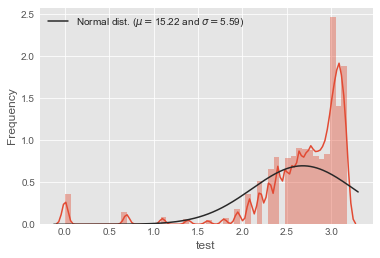

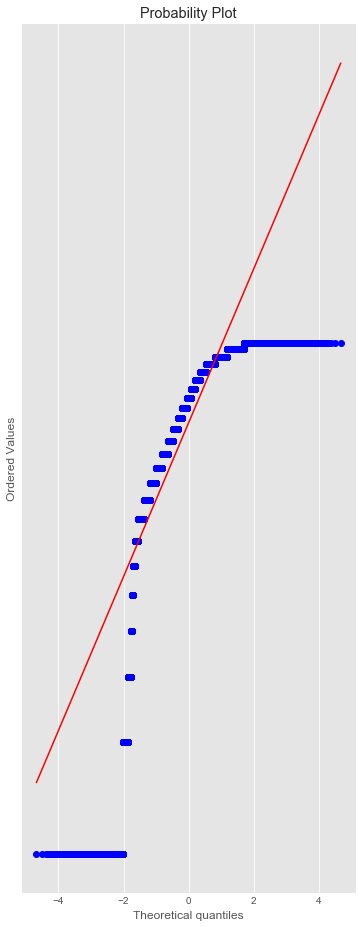

In [124]:
train['test'] = np.log1p(train.hour)
plt_func('test', figsize=(6, 16), y_ticks=np.arange(6, 6))
del train['test']

In [121]:
del train['context_timestamp']

In [126]:
train.hour.unique()

array([10, 12,  3,  6, 19, 23, 22, 16,  2, 17, 11, 14,  0, 18, 15, 21,  8,
       20,  9, 13,  1,  7,  4,  5], dtype=int64)

hour


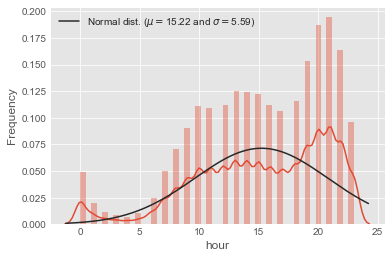

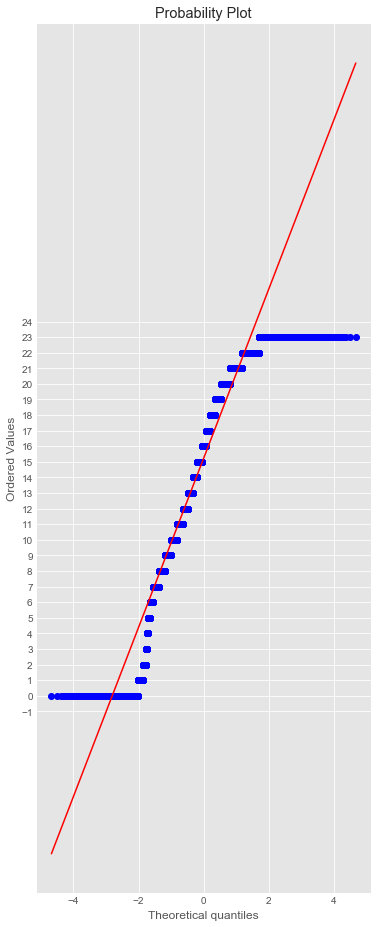

In [128]:
plt_func('hour', figsize=(6, 16), y_ticks=np.arange(-1, 25, 1))

In [130]:
tt = pd.cut(train.hour, bins=[-1, 1, 6, 22.5, 24])
tt = LabelEncoder().fit_transform(tt)
tt = pd.DataFrame(tt)
tt.rename(columns={0:'hour'}, inplace=True)
train.pop('hour')
train = pd.concat([train, tt], axis=1)
train.hour.unique()

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

hour


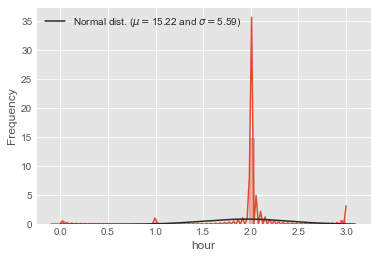

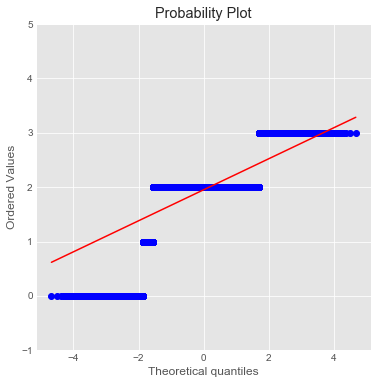

In [132]:
plt_func('hour', figsize=(6,6), y_ticks=np.arange(-1, 6, 1))

In [134]:
train.item_price_level.unique()

array([ 3,  8,  7,  5,  4,  6,  9,  2, 10,  1, 11,  0, 17, 16],
      dtype=int64)

((array([-4.67782358, -4.49254477, -4.39220657, ...,  4.39220657,
          4.49254477,  4.67782358]),
  array([ 0,  0,  0, ..., 11, 16, 17], dtype=int64)),
 (1.0179816720259058, 6.777175208830923, 0.9347454859472366))

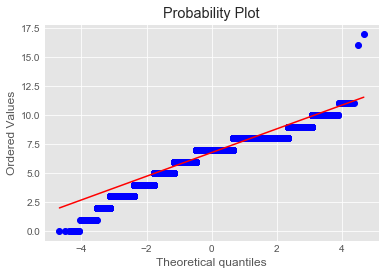

In [135]:
stats.probplot(train.item_price_level, plot=plt)


In [137]:
train[train['item_price_level']>12]['item_price_level']

430354    17
474049    16
Name: item_price_level, dtype: int64

In [139]:
train[train.item_price_level>12].index

Int64Index([430354, 474049], dtype='int64')

In [140]:
train = train.drop(train[train.item_price_level>12].index)

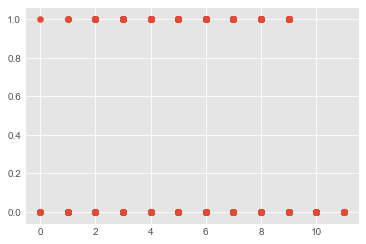

In [141]:
plt.scatter(train.item_price_level, train.is_trade)

item_price_level


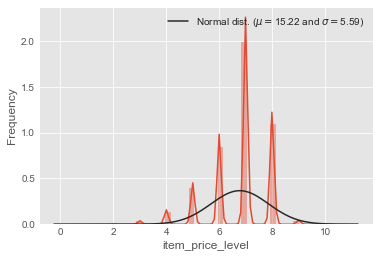

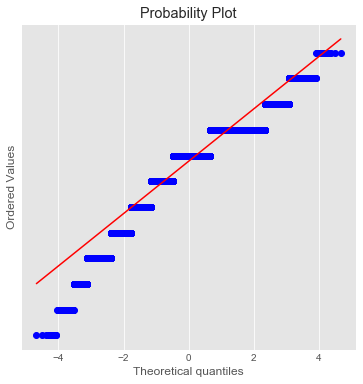

In [143]:
plt_func('item_price_level')

test


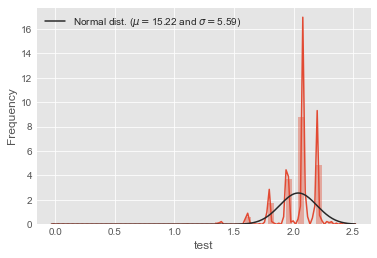

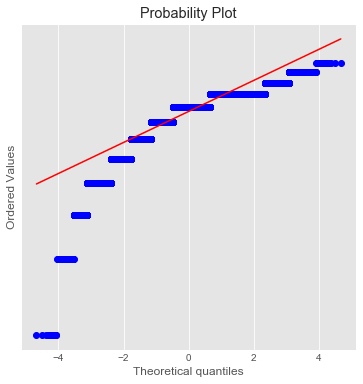

In [144]:
train['test'] = np.log1p(train.item_price_level)
plt_func('test')
del train['test']

user_age_level


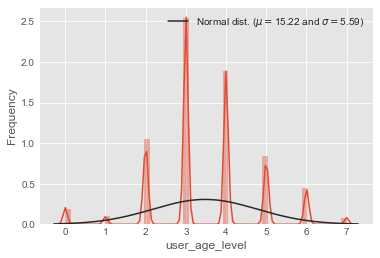

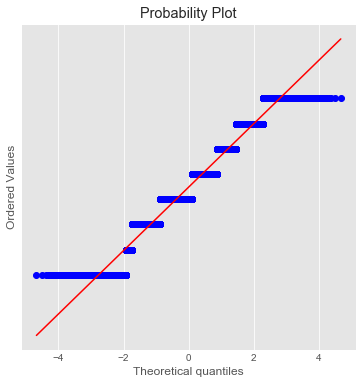

array([3, 2, 4, 6, 5, 7, 0, 1], dtype=int64)

In [147]:
plt_func('user_age_level')
train.user_age_level.unique()

([<matplotlib.axis.YTick at 0x24c80ddf320>,
 <a list of 9 Text yticklabel objects>)

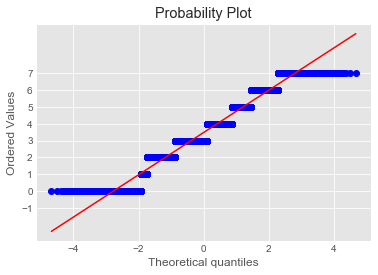

In [149]:
stats.probplot(train.user_age_level, plot=plt)
plt.yticks(np.arange(-1, 8, 1))

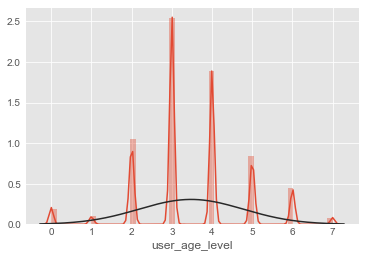

In [150]:
sns.distplot(train.user_age_level, fit=norm)


In [154]:
tt = pd.cut(train.user_age_level, bins=[-1, 1, 6.5, 8])
tt.unique()

[(1.0, 6.5], (6.5, 8.0], (-1.0, 1.0]]
Categories (3, interval[float64]): [(-1.0, 1.0] < (1.0, 6.5] < (6.5, 8.0]]

In [155]:
tt = pd.DataFrame(tt)
tt.rename(columns={0: 'user_age_level'}, inplace=True)
train.pop('user_age_level')
train = pd.concat([train, tt], axis=1)
train.user_age_level.unique()

[(1.0, 6.5], (6.5, 8.0], (-1.0, 1.0]]
Categories (3, interval[float64]): [(-1.0, 1.0] < (1.0, 6.5] < (6.5, 8.0]]

In [156]:
train.user_age_level = LabelEncoder().fit_transform(train.user_age_level)
train.user_age_level.unique()

array([1, 2, 0], dtype=int64)

user_age_level


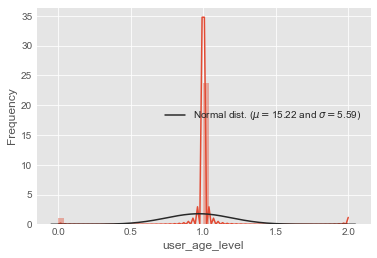

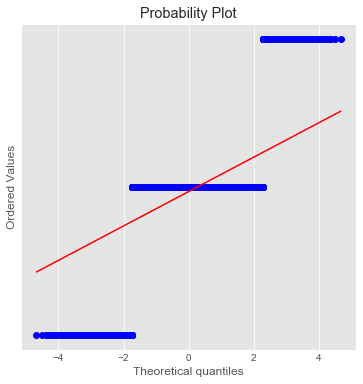

In [157]:
plt_func('user_age_level')

user_occupation_id


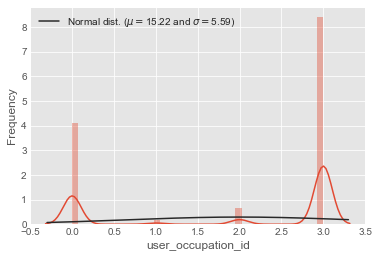

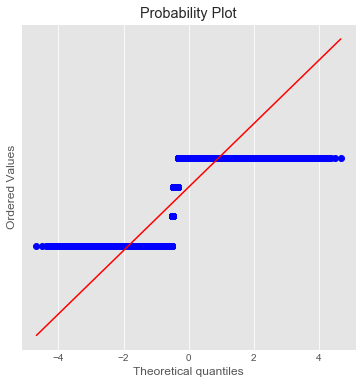

array([3, 0, 2, 1], dtype=int64)

In [158]:
plt_func('user_occupation_id')
train.user_occupation_id.unique()

user_star_level


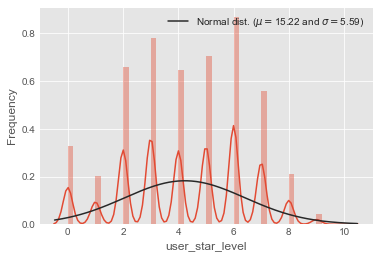

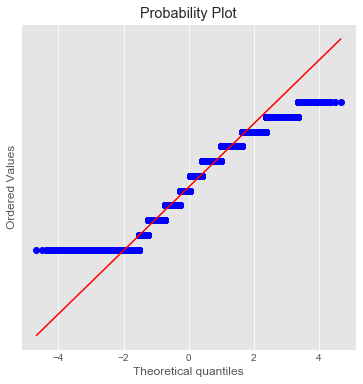

array([ 3,  6,  4,  1,  2,  0,  7,  5,  8,  9, 10], dtype=int64)

In [159]:
plt_func('user_star_level')
train.user_star_level.unique()

In [160]:

train.context_id.unique()

array([ 14807, 207650, 253521, ..., 306240, 258534, 198669], dtype=int64)

In [161]:
cols

['instance_id',
 'item_id',
 'item_category_list',
 'item_property_list',
 'item_brand_id',
 'item_city_id',
 'item_price_level',
 'item_sales_level',
 'item_collected_level',
 'item_pv_level',
 'user_id',
 'user_gender_id',
 'user_age_level',
 'user_occupation_id',
 'user_star_level',
 'context_id',
 'context_timestamp',
 'context_page_id',
 'predict_category_property',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_star_level',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description']

In [167]:
cols[-9:]

['context_page_id',
 'predict_category_property',
 'shop_id',
 'shop_review_num_level',
 'shop_review_positive_rate',
 'shop_star_level',
 'shop_score_service',
 'shop_score_delivery',
 'shop_score_description']

In [174]:
train.pop('context_timestamp_tmp')
cols = list(train.columns)

In [175]:
cols[-9:]

['item_property_list_10',
 'item_property_list_11',
 'item_property_list_12',
 'item_property_list_13',
 'item_property_list_14',
 'week',
 'day',
 'hour',
 'user_age_level']

item_property_list_10
[1556 1089 1401 ... 1211  851 1419]
item_property_list_10


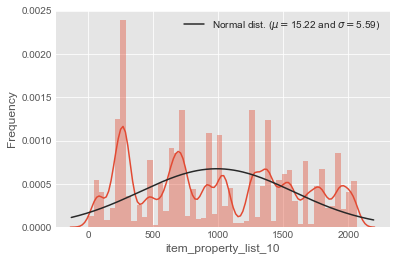

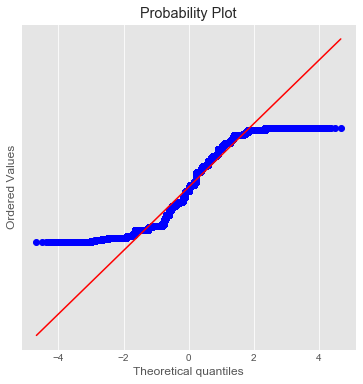

item_property_list_11
[2306   32 1851 ...   46  482  484]
item_property_list_11


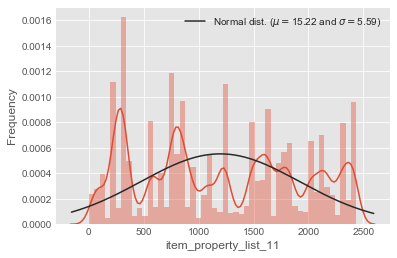

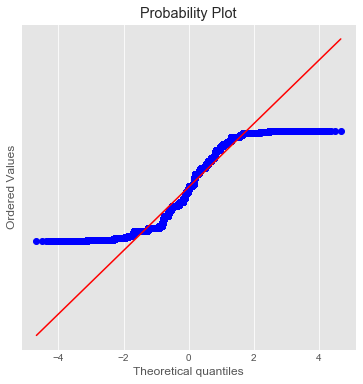

item_property_list_12
[2772 2093 2470 ...  108  981 2658]
item_property_list_12


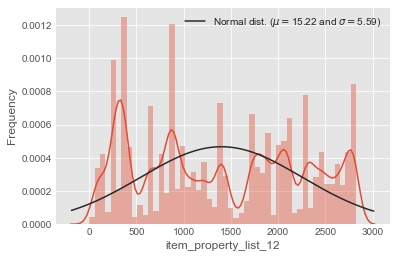

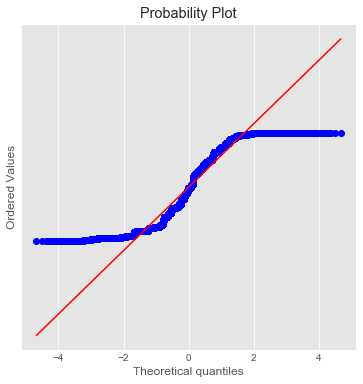

item_property_list_13
[2023  112 1418 ... 3127 2728  514]
item_property_list_13


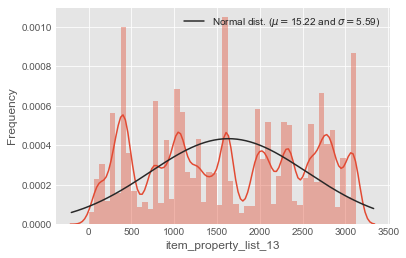

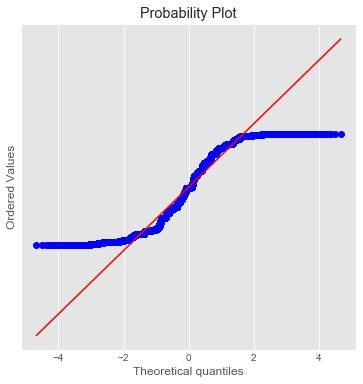

item_property_list_14
[2895  956 1341 ... 1947 1981  960]
item_property_list_14


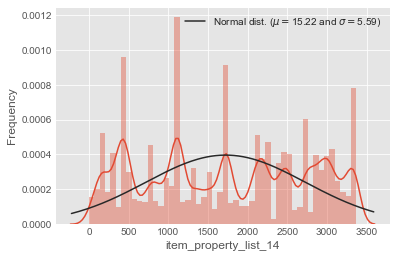

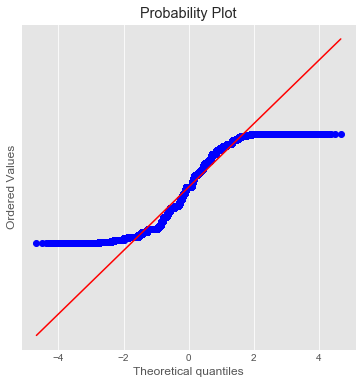

week
[1 4 2 3 5 6 0]
week


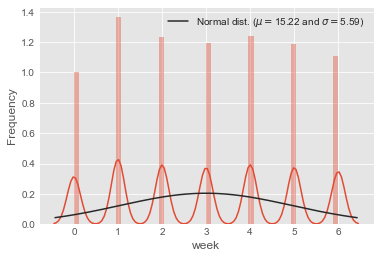

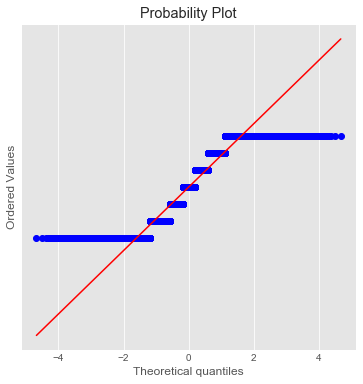

day
[18 21 19 20 22 23 24]
day


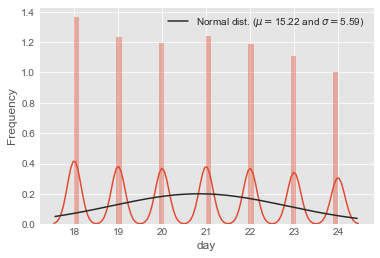

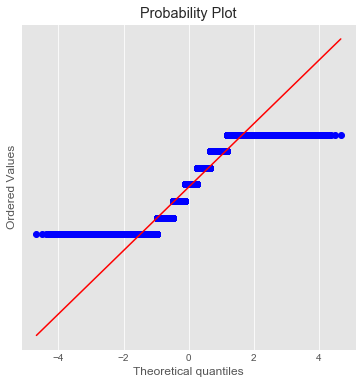

hour
[2 1 3 0]
hour


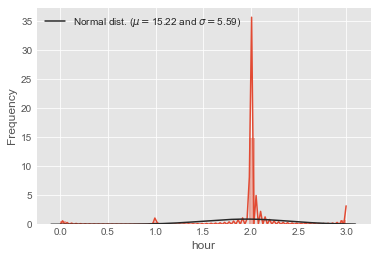

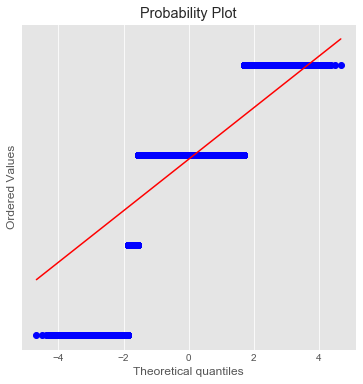

user_age_level
[1 2 0]
user_age_level


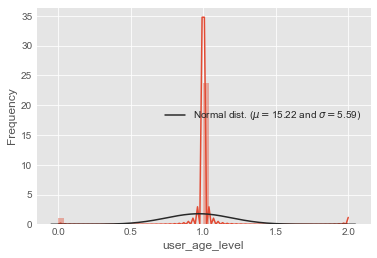

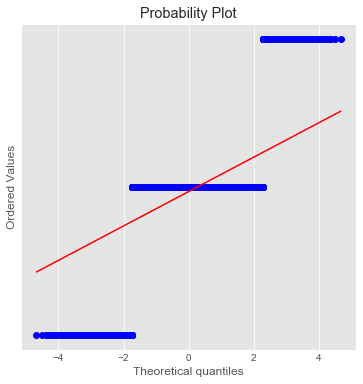

In [176]:
for c in cols[-9:]:
    print(c)
    print(train[c].unique())
    plt_func(c)

In [177]:
train.to_csv('E:\\project\\tianchi game\\tianchi_data\\round1_ijcai_18_train_20180301_clean.txt', index=False)

In [178]:
len(train.columns)

61

In [179]:
gc.collect()

17191

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
y = train.pop('is_trade')
X = train


NameError: name 'train_test_split' is not defined

In [184]:
from sklearn.cross_validation  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样

In [190]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)
lr_prob

array([[0.97971136, 0.02028864],
       [0.97962654, 0.02037346],
       [0.99058964, 0.00941036],
       ...,
       [0.98017529, 0.01982471],
       [0.98522734, 0.01477266],
       [0.9858504 , 0.0141496 ]])

In [191]:
lr_prob = lr_prob[:, 1]
lr_prob

array([0.02028864, 0.02037346, 0.00941036, ..., 0.01982471, 0.01477266,
       0.0141496 ])

In [192]:
log_loss(y_test, lr_prob)

0.09505166372857173

In [193]:
train.item_pv_level.unique()

array([14, 13, 16, 12,  6,  8, 18, 19, 17, 20, 15, 11, 10,  9, 21,  5,  7,
        4,  2,  3,  0,  1], dtype=int64)

item_pv_level


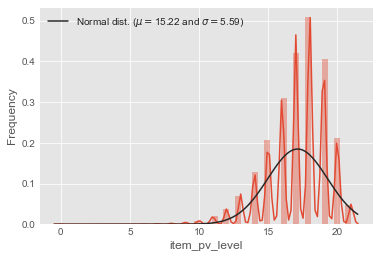

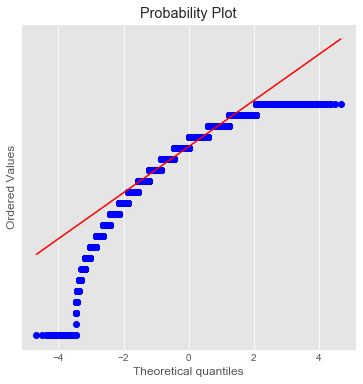

In [194]:
plt_func('item_pv_level')

In [195]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 50)
rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
col_filter = X_train.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量

[False False  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True False False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True]
[ 7  4  1  1  1  1  1  1  5  1  1  1  6  1  1  1  1  1  1  1  1  1  1  1
  1  9  1 11 10  1  1  8  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  3  1  1  2  1  1  1  1  1]


NameError: name 'x_val' is not defined

In [198]:
col_filter = X_train.columns[rfe.support_]
print(len(col_filter))
col_filter

50


Index(['item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_gender_id',
       'user_occupation_id', 'user_star_level', 'context_page_id', 'shop_id',
       'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery', 'shop_score_description',
       'predict_category_property_0', 'predict_category_property_1',
       'predict_category_property_2', 'predict_category_property_3',
       'item_category_list_1', 'item_category_list_4', 'item_category_list_5',
       'item_category_list_7', 'item_category_list_8', 'item_category_list_9',
       'item_category_list_10', 'item_category_list_11',
       'item_category_list_12', 'item_category_list_13',
       'item_category_list_14', 'item_category_list_15',
       'item_property_list_0', 'item_property_list_1', 'item_property_list_2',
       'item_property_list_3', 'item_property_list_4', 'item_property_li

In [203]:
lr.fit(X_train[col_filter], y_train)
y_prob = lr.predict_proba(X_test[col_filter])[:, 1]
log_loss(y_test, y_prob)

0.09134235346314719

In [204]:
len(train.columns)

60

In [205]:
len(col_filter)

50

In [207]:
X_train = X_train[col_filter]
X_test = X_test[col_filter]
print(X_test.columns)
print(len(X_test.columns))

Index(['item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_gender_id',
       'user_occupation_id', 'user_star_level', 'context_page_id', 'shop_id',
       'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level',
       'shop_score_service', 'shop_score_delivery', 'shop_score_description',
       'predict_category_property_0', 'predict_category_property_1',
       'predict_category_property_2', 'predict_category_property_3',
       'item_category_list_1', 'item_category_list_4', 'item_category_list_5',
       'item_category_list_7', 'item_category_list_8', 'item_category_list_9',
       'item_category_list_10', 'item_category_list_11',
       'item_category_list_12', 'item_category_list_13',
       'item_category_list_14', 'item_category_list_15',
       'item_property_list_0', 'item_property_list_1', 'item_property_list_2',
       'item_property_list_3', 'item_property_list_4', 'item_property_li

In [ ]:
rfe = RFE(lr, 40)
rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)
col_filter = X_train.columns[rfe.support_]
col_filter

In [ ]:
lr.fit(X_train[col_filter], y_train)
y_prob = lr.predict_prob(X_test[col_filter])[:, 1]
log_loss(y_test, y_prob)